In [1]:
import pandas as pd
datename = '180101To220825'
pricefilename = '{}{}{}'.format('data/price_',datename,'.pkl')
premfilename = '{}{}{}'.format('data/prem_',datename,'.pkl')
day_returnfilename = '{}{}{}'.format('data/day_return_',datename,'.pkl')
price100filename = '{}{}{}'.format('data/price100_',datename,'.pkl')
prem100filename = '{}{}{}'.format('data/prem100_',datename,'.pkl')

pricedf=pd.read_pickle(pricefilename)  #构建收盘价矩阵
premdf=pd.read_pickle(premfilename)    #构造溢价率矩阵。
day_return=pd.read_pickle(day_returnfilename)  #构建收益率矩阵
price100df=pd.read_pickle(price100filename)  #构建分数位的收盘价矩阵
prem100df=pd.read_pickle(prem100filename)    #构造分数位的溢价率矩阵。

<AxesSubplot:xlabel='tradeDate'>

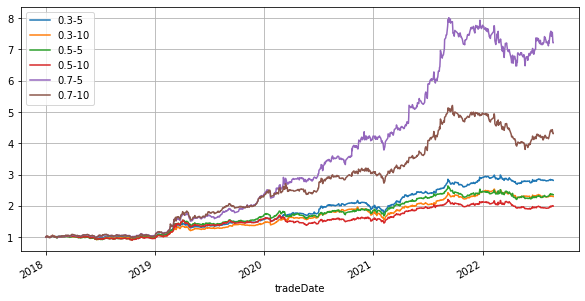

In [2]:
#通过筛选每日最低的N个转债来得到信号矩阵
def selectTopN(tmp):
    tmp=tmp.copy()
    symbols=tmp.nsmallest(N).index
    tmp[:]=0
    tmp[symbols]=1
    return tmp

pnl=pd.DataFrame()
N = 5
for k in [0.3,0.5,0.7]:
    for freq in [5,10]:
        factor=k*premdf+(1-k)*pricedf
        signal=factor.apply(selectTopN,axis=1)
        tmpdf=signal.iloc[range(0,len(signal),freq)]
        week_selected_df=pd.DataFrame(index=signal.index)
        week_selected_df=week_selected_df.join(tmpdf)
        week_selected_df=week_selected_df.fillna(method='pad')
        a=str(k)+"-"+str(freq)
        pnl[a]=(week_selected_df*day_return).sum(axis=1)/N  
(pnl+1).cumprod().plot(figsize=(10,5),grid=True)

<AxesSubplot:xlabel='tradeDate'>

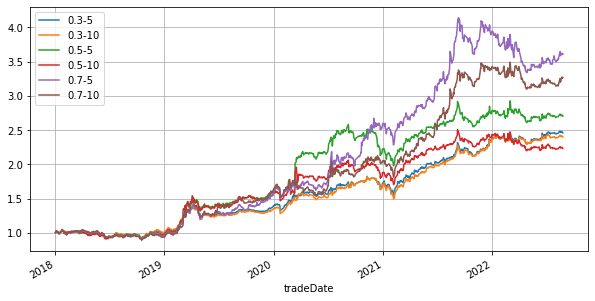

In [3]:
pricedf=pricedf.rank(method='first',axis=1)
premdf=premdf.rank(method='first',axis=1)
pnl=pd.DataFrame()
N = 5
for k in [0.3,0.5,0.7]:
    for freq in [5,10]:
        factor=(1-k)*pricedf+k*premdf
        signal=factor.apply(selectTopN,axis=1)
        tmpdf=signal.iloc[range(0,len(signal),freq)]
        week_selected_df=pd.DataFrame(index=signal.index)
        week_selected_df=week_selected_df.join(tmpdf)
        week_selected_df=week_selected_df.fillna(method='pad')
        a=str(k)+"-"+str(freq)
        pnl[a]=(week_selected_df*day_return).sum(axis=1)/N  
(pnl+1).cumprod().plot(figsize=(10,5),grid=True)